In [1]:
# Dataset Link: https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

# Hint:
#     import pandas as pd
#     import numpy as np
#     import matplotlib.plt as plt
#     %matplotlib inline
    
#     data= pd.read_csv('/Users/pradmishra/Documents/data_stocks.csv')
#     data.head()
    
# Problem 1:
#     There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance?

# Problem 2:
#     How many Unique patterns that exist in the historical stock data set, based on fluctuations in price?

# Problem 3:
#     Identify which all stocks are moving together and which all stocks are different from each other?
        
 

# Load libraries

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array

# Core Libraries - Machine Learning
import sklearn
 
# Importing Clustering - Modelling
from sklearn.cluster import KMeans


# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

# Load Data

In [4]:
stock_data = pd.read_csv('data_stocks.csv')
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Understand the Dataset and Data

In [5]:
stock_data.shape

(41266, 502)

In [6]:
stock_data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [7]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
stock_data.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [10]:
stock_data.get_dtype_counts()

float64    501
int64        1
dtype: int64

# Clean the data


In [11]:
print(stock_data.columns.values)

['DATE' 'SP500' 'NASDAQ.AAL' 'NASDAQ.AAPL' 'NASDAQ.ADBE' 'NASDAQ.ADI'
 'NASDAQ.ADP' 'NASDAQ.ADSK' 'NASDAQ.AKAM' 'NASDAQ.ALXN' 'NASDAQ.AMAT'
 'NASDAQ.AMD' 'NASDAQ.AMGN' 'NASDAQ.AMZN' 'NASDAQ.ATVI' 'NASDAQ.AVGO'
 'NASDAQ.BBBY' 'NASDAQ.BIIB' 'NASDAQ.CA' 'NASDAQ.CBOE' 'NASDAQ.CELG'
 'NASDAQ.CERN' 'NASDAQ.CHRW' 'NASDAQ.CHTR' 'NASDAQ.CINF' 'NASDAQ.CMCSA'
 'NASDAQ.CME' 'NASDAQ.COST' 'NASDAQ.CSCO' 'NASDAQ.CSX' 'NASDAQ.CTAS'
 'NASDAQ.CTSH' 'NASDAQ.CTXS' 'NASDAQ.DISCA' 'NASDAQ.DISCK' 'NASDAQ.DISH'
 'NASDAQ.DLTR' 'NASDAQ.EA' 'NASDAQ.EBAY' 'NASDAQ.EQIX' 'NASDAQ.ESRX'
 'NASDAQ.ETFC' 'NASDAQ.EXPD' 'NASDAQ.EXPE' 'NASDAQ.FAST' 'NASDAQ.FB'
 'NASDAQ.FFIV' 'NASDAQ.FISV' 'NASDAQ.FITB' 'NASDAQ.FLIR' 'NASDAQ.FOX'
 'NASDAQ.FOXA' 'NASDAQ.GILD' 'NASDAQ.GOOG' 'NASDAQ.GOOGL' 'NASDAQ.GRMN'
 'NASDAQ.GT' 'NASDAQ.HAS' 'NASDAQ.HBAN' 'NASDAQ.HOLX' 'NASDAQ.HSIC'
 'NASDAQ.IDXX' 'NASDAQ.ILMN' 'NASDAQ.INCY' 'NASDAQ.INFO' 'NASDAQ.INTC'
 'NASDAQ.INTU' 'NASDAQ.ISRG' 'NASDAQ.JBHT' 'NASDAQ.KHC' 'NASDAQ.KLAC'
 'NASDAQ.LKQ' 'NAS

***Since we are unsure of the names of the companies and the stocks column names associated with them, it would be better to refrain from changing the column names. However, I guess we could replace the '.' in the column names with '_'. But we won't be doing that.***

## Clean Numerical Columns


### Null values

In [12]:
# Check if there are any null values. Since there are many columns, total sum of rows or elements which are null 
# across all columns tells us whether we need to consider to impute or remove those rows
stock_data.isna().sum().sum()

0

***There are no null values***

### 0s 

In [13]:
# Check if there are any 0 values. Since there are many columns, total sum of rows or elements which have '0' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
stock_data[stock_data==0].any().sum()
       # OR
# data.loc[(data==0).any(axis=1),:].sum().sum()

0

***There are no rows or elements with '0' values*** 

### Nonsensical values

In [14]:
# Check if there are any -ve values. Since there are many columns, total sum of rows or elements which have '-ve' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
stock_data[stock_data<0].any().sum()
       # OR
# stock_data.loc[(data<0).any(axis=1),:].sum().sum()

0

***There are no rows or elements with '-ve' values***

***If I have not considerred any other types of garbage values, please let me know.
This is my github ID: https://github.com/vnpraveenb and this is my Kaggle ID: https://www.kaggle.com/praveenbalijepalli***

# Get Basic Statistical Information

In [15]:
stock_data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


# Explore Data - Non-Visual and Visual Analysis

## Uni-variate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDB5E8A2E8>,
      dtype=object)

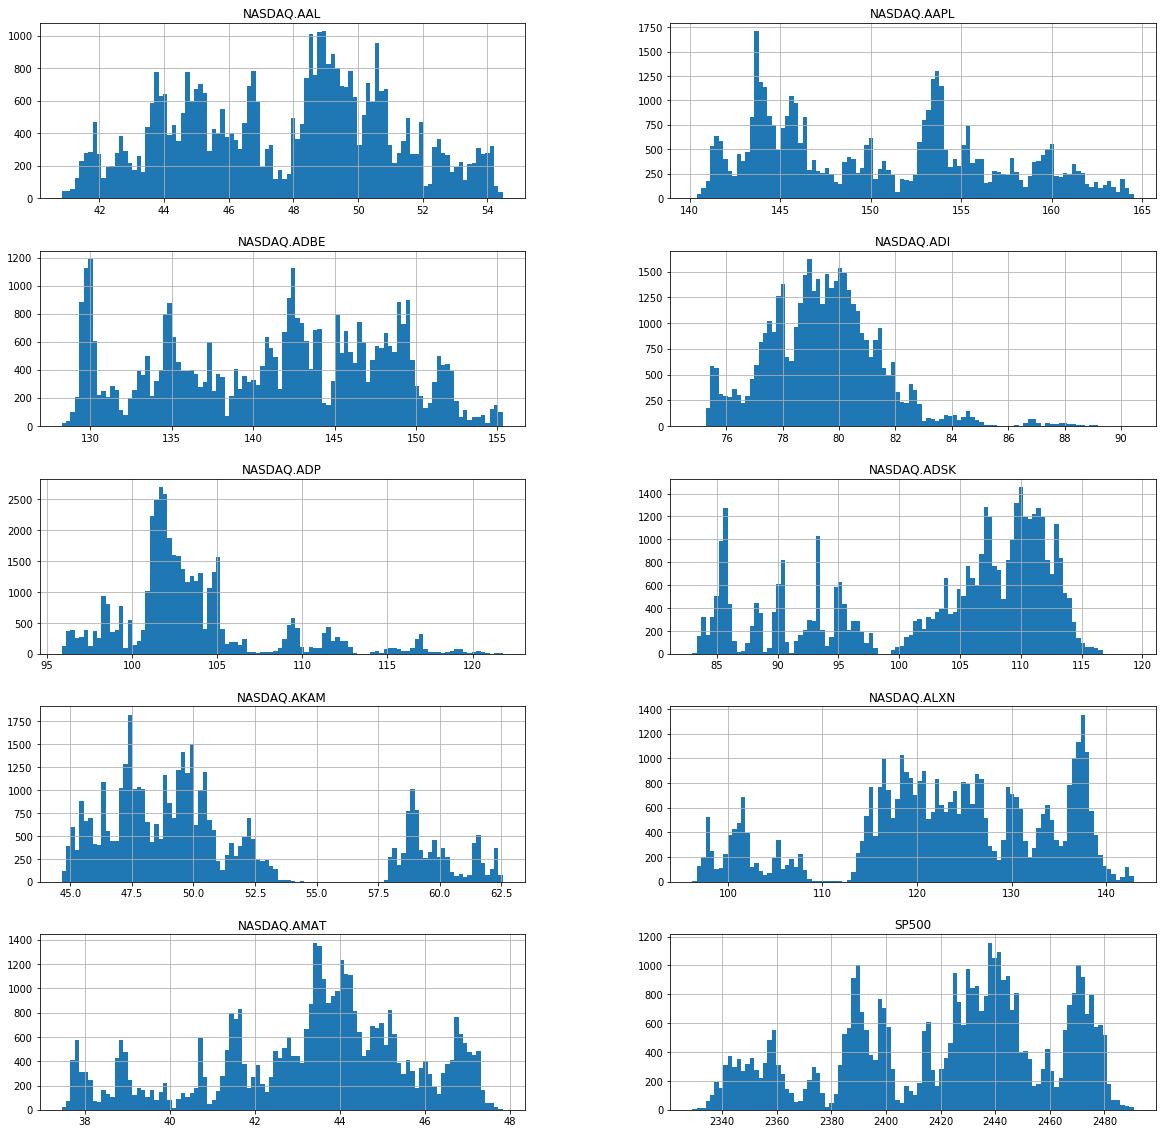

In [16]:
stock_data.iloc[:,1:11].hist(bins=100, figsize=(20,20), layout=(5,2)) # Plotting the first 10 columns excluding the date

***The distribution of values of stocks of the 10 companies, do not follow any specfic distribution,like normal distribution, multinomial distribution etc.***

## Time Series plot for 1st 10 stock columns in the dataset by date

### Time Series Plot using Epoch time

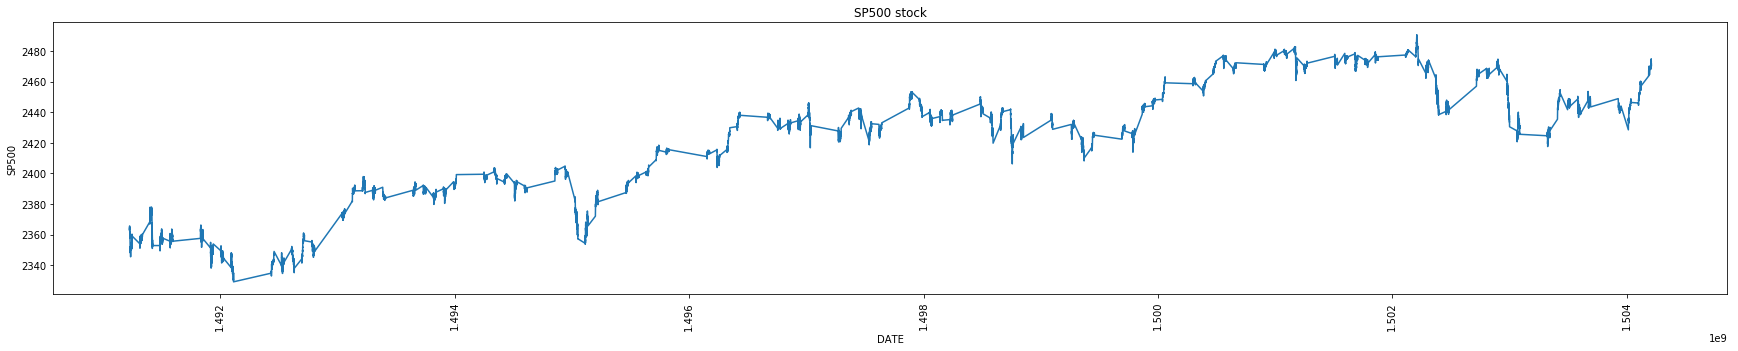

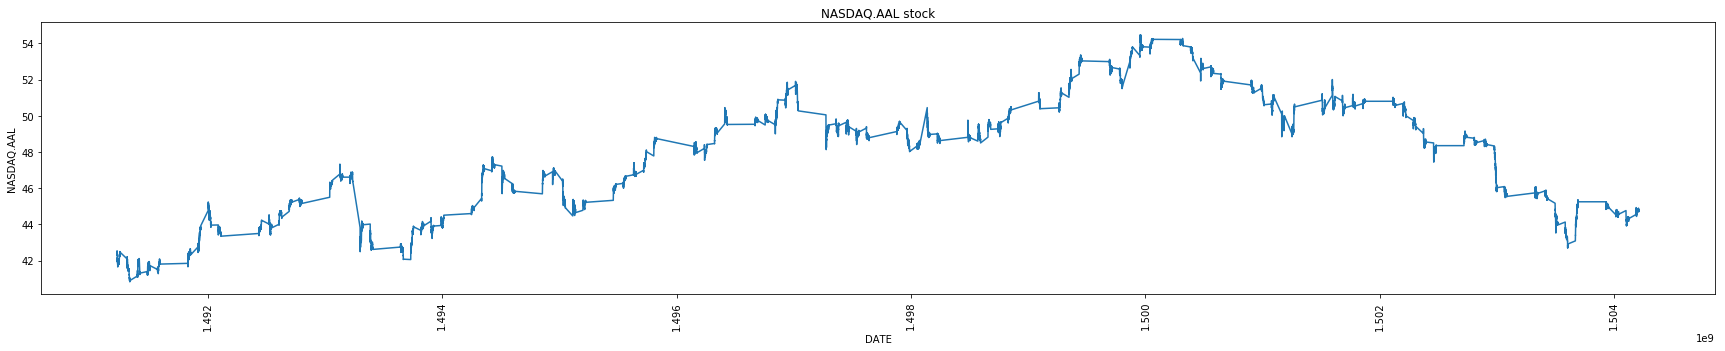

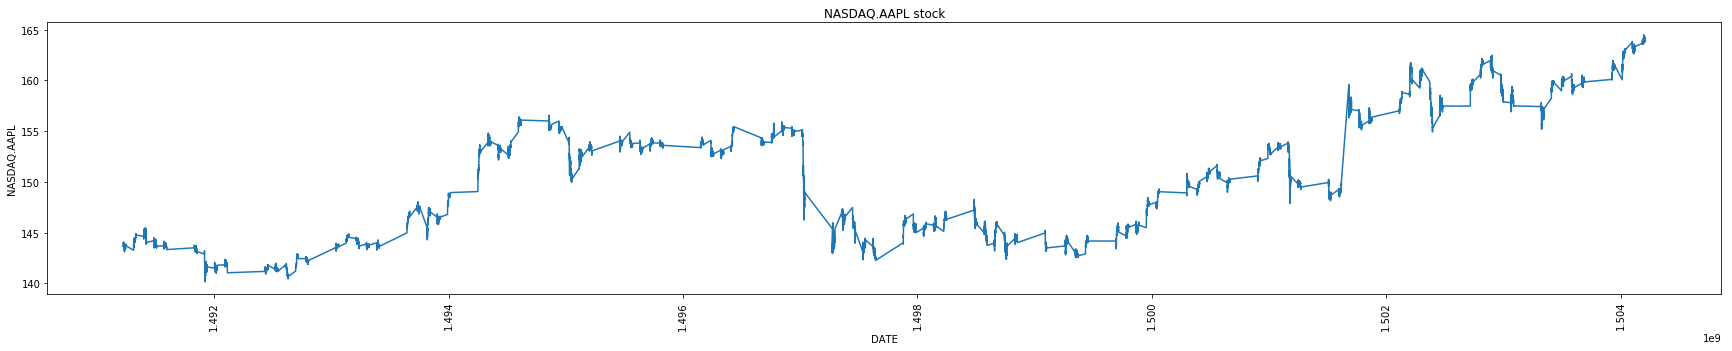

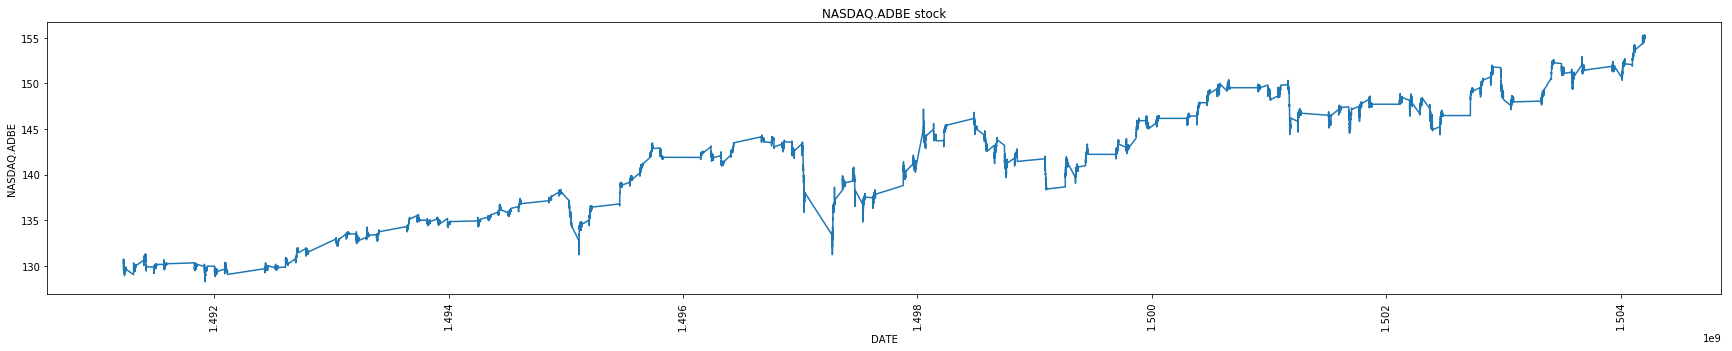

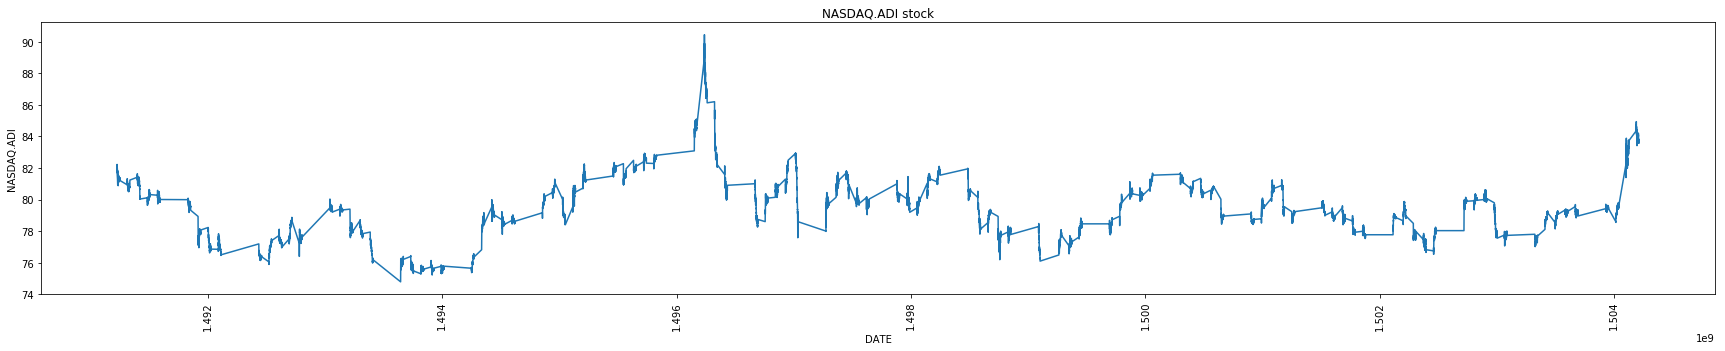

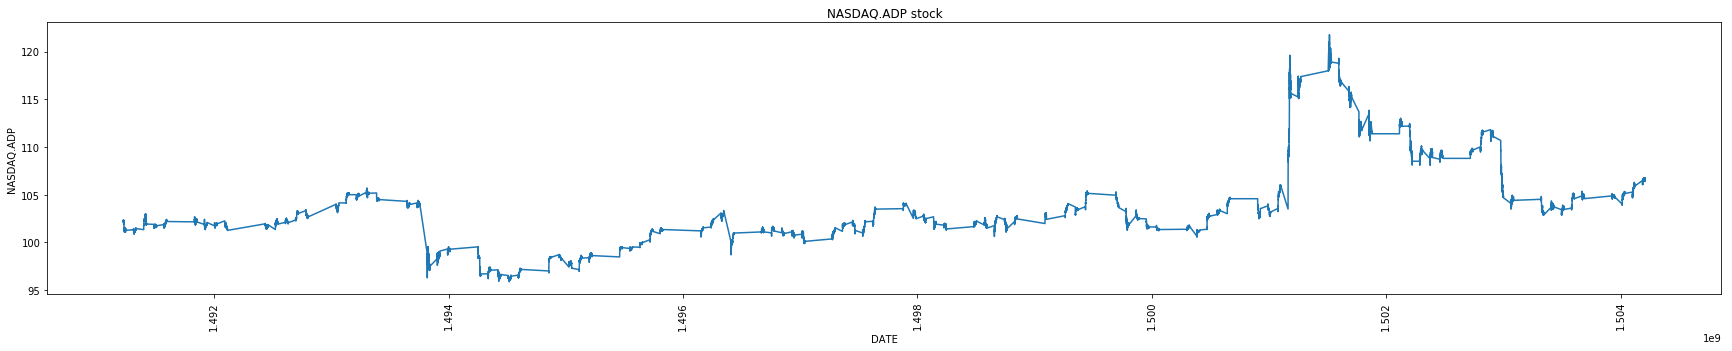

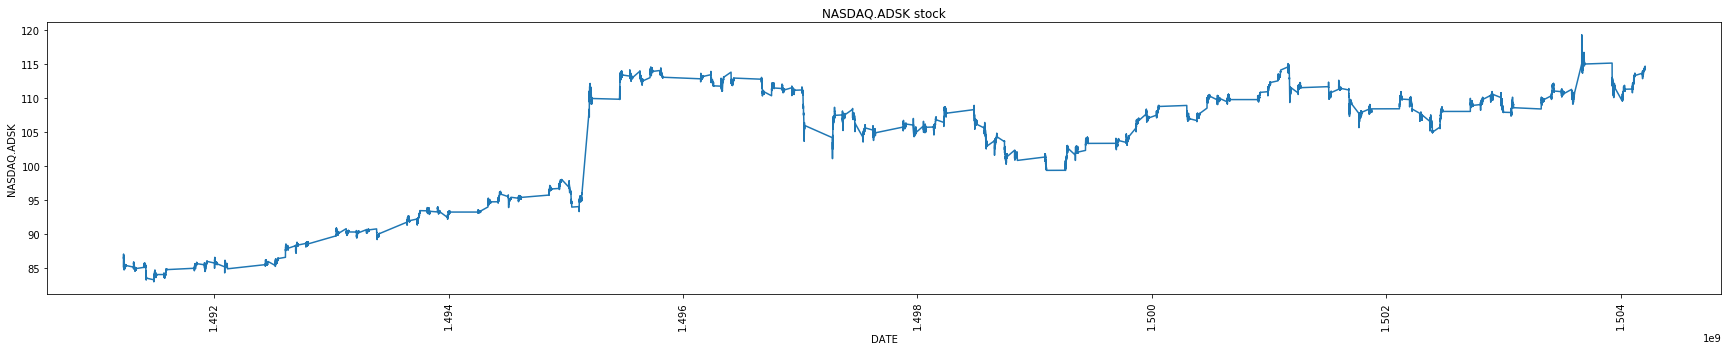

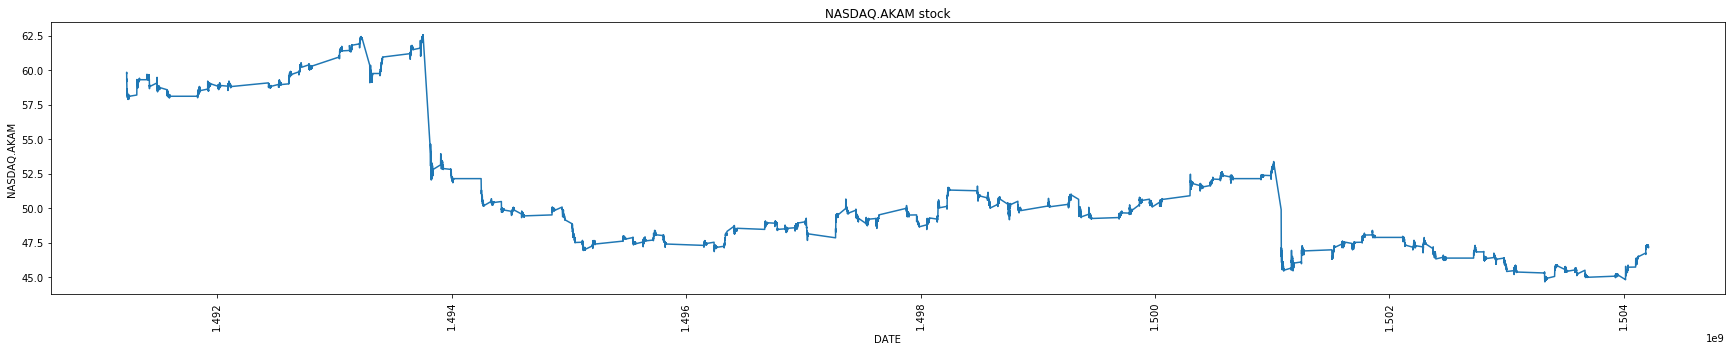

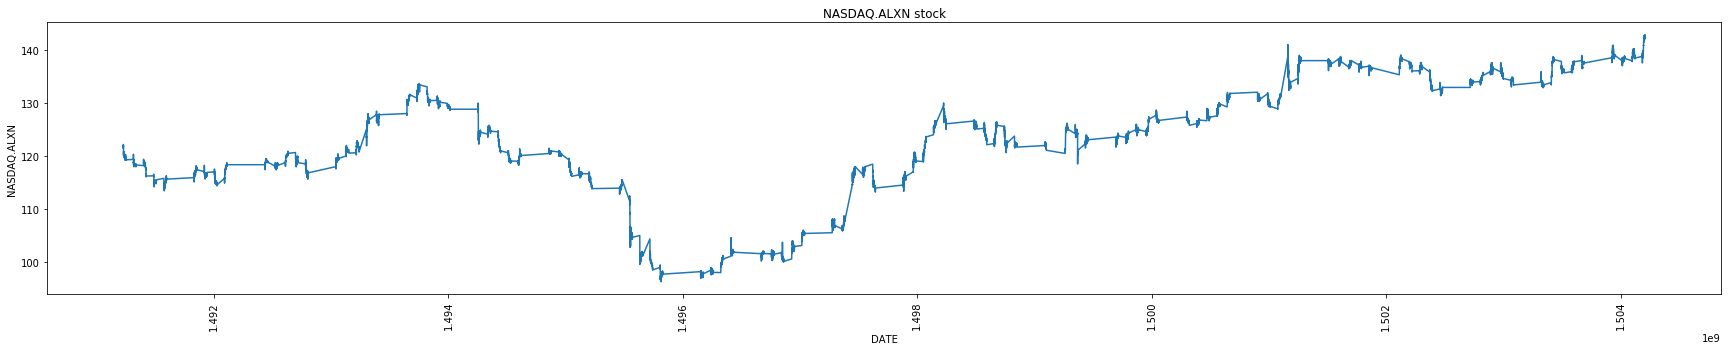

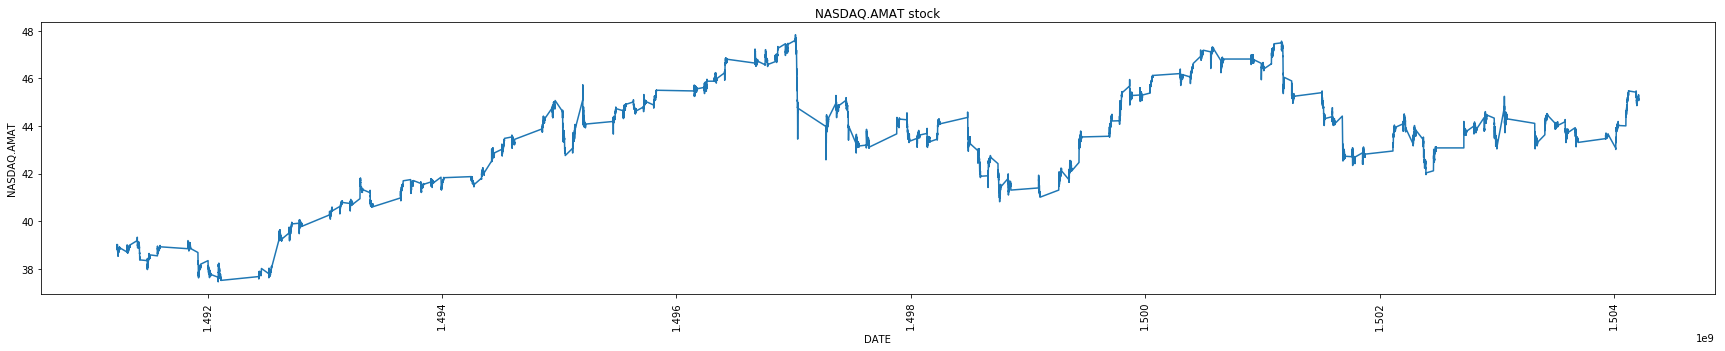

In [17]:
plt.figure(figsize= (20,20))
for i,col in enumerate(stock_data.iloc[:,0:11].columns.values):
    if i==0:
        continue
    else:
        plt.figure(figsize= (30,5))
        plt.title(col + ' stock')
        plt.xlabel('Date')
        plt.ylabel('Stock value ' + str(col))
        plt.xticks(rotation=90)
        sns.lineplot(stock_data.iloc[:,0],stock_data.iloc[:,i])

### Time Series Plot using Date Only

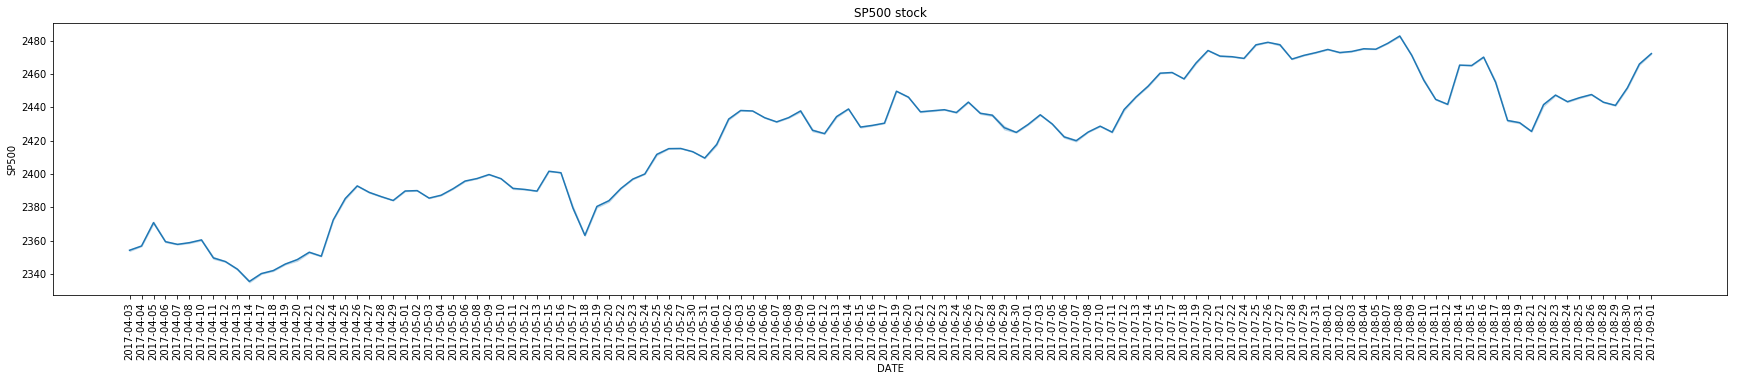

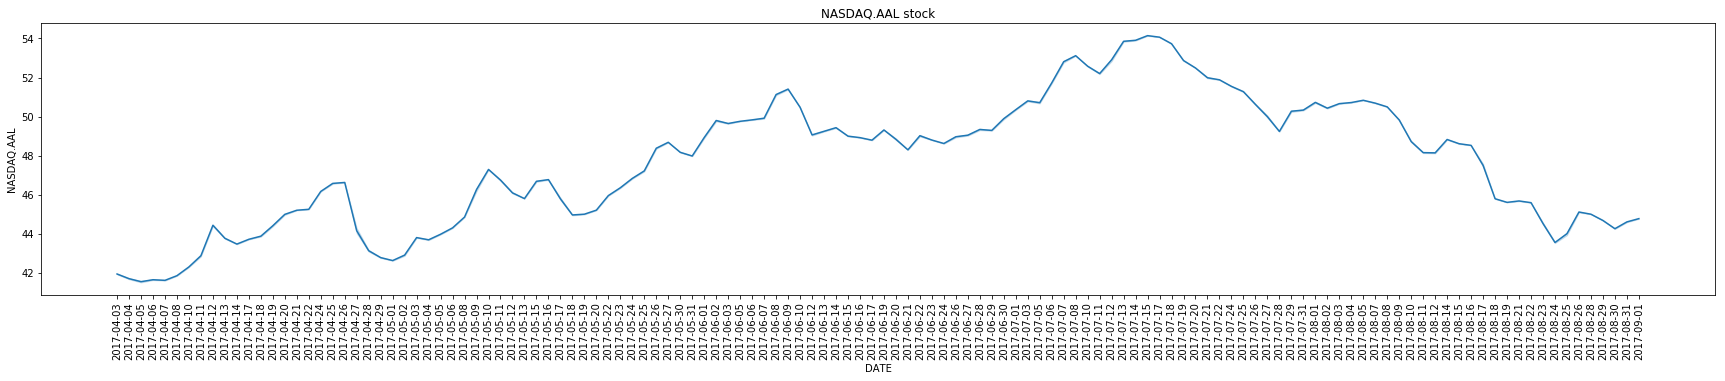

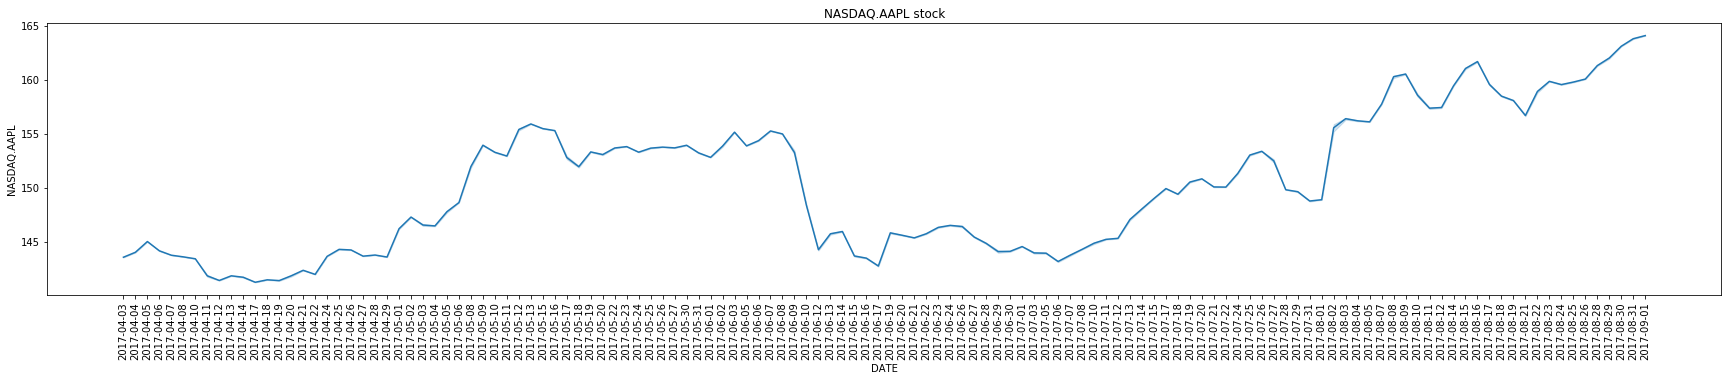

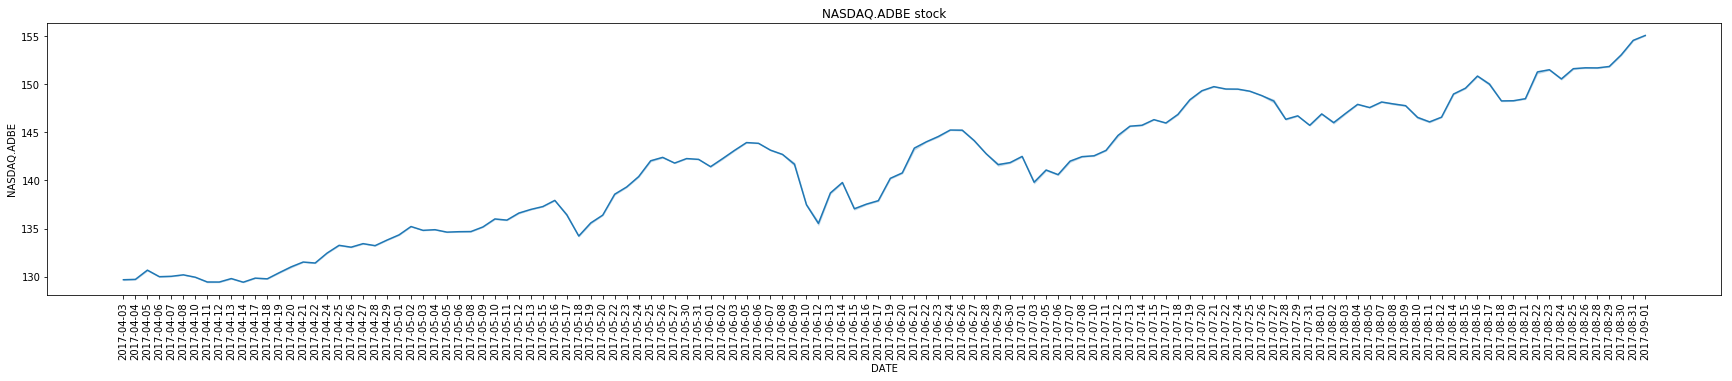

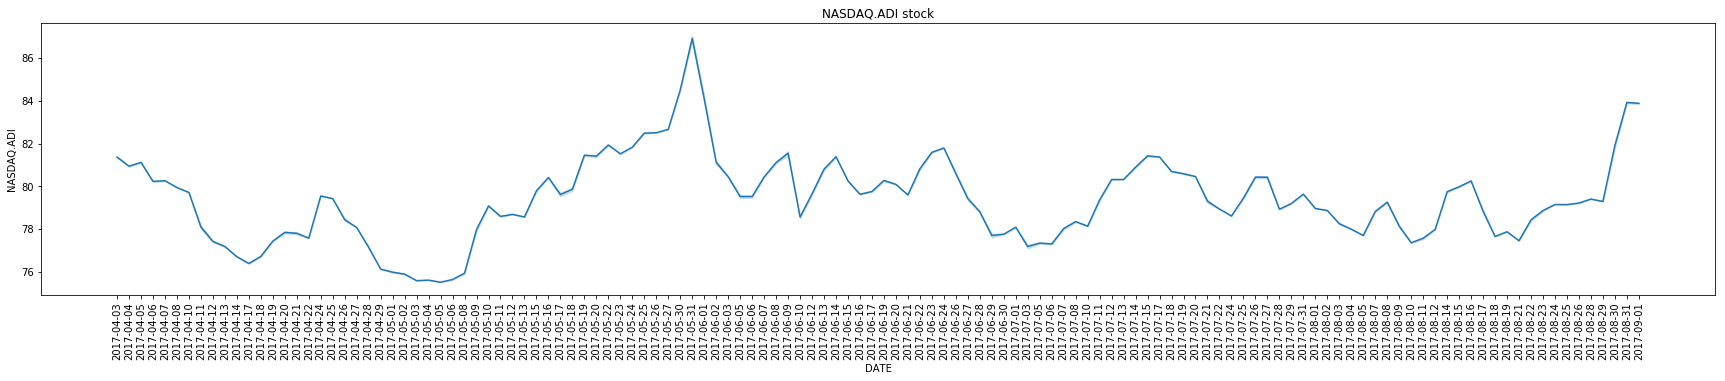

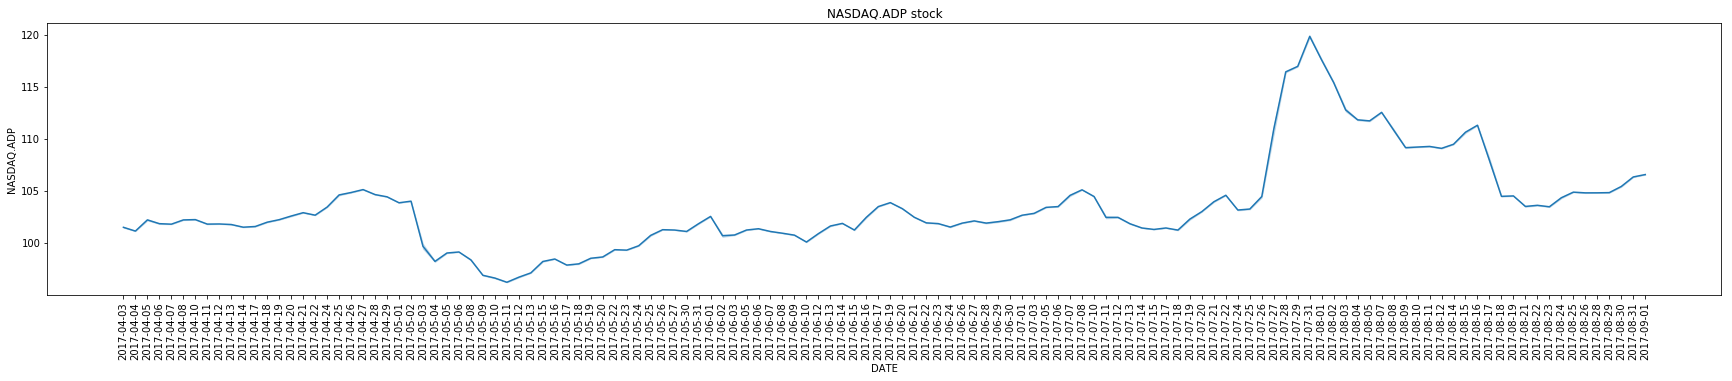

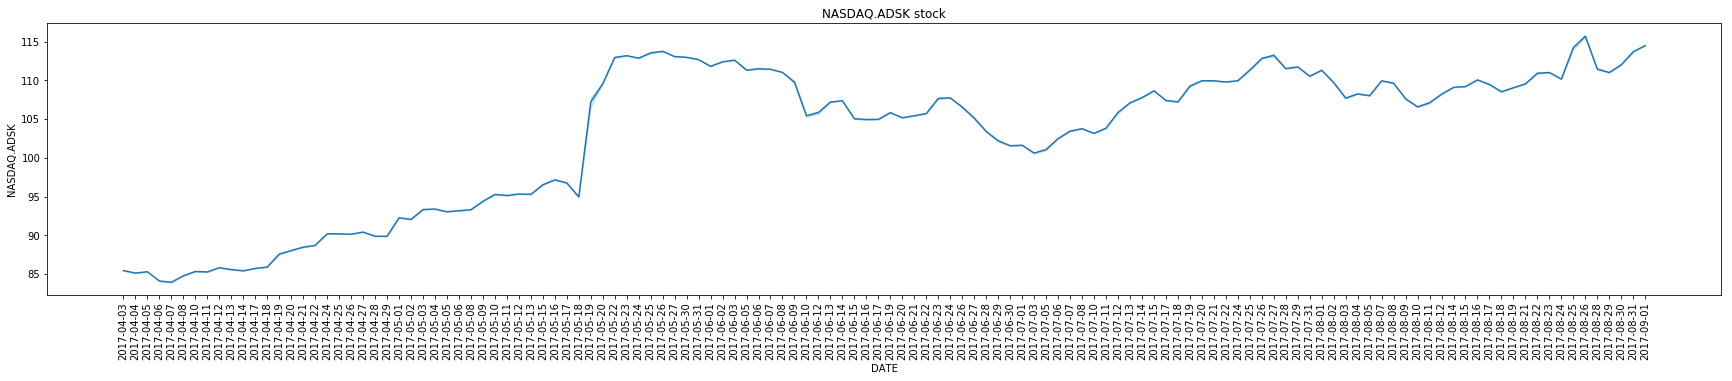

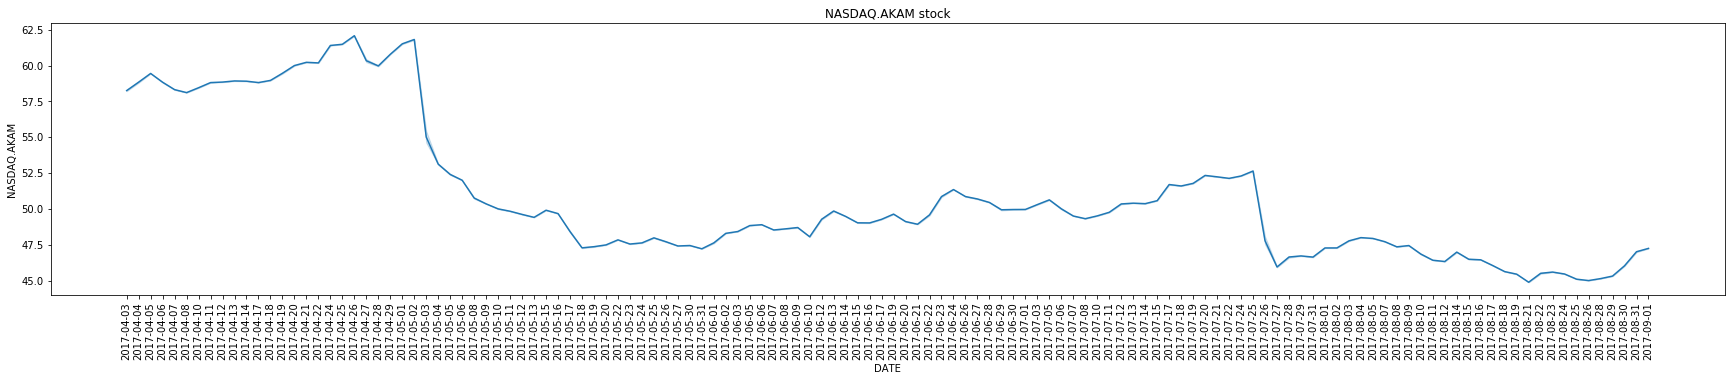

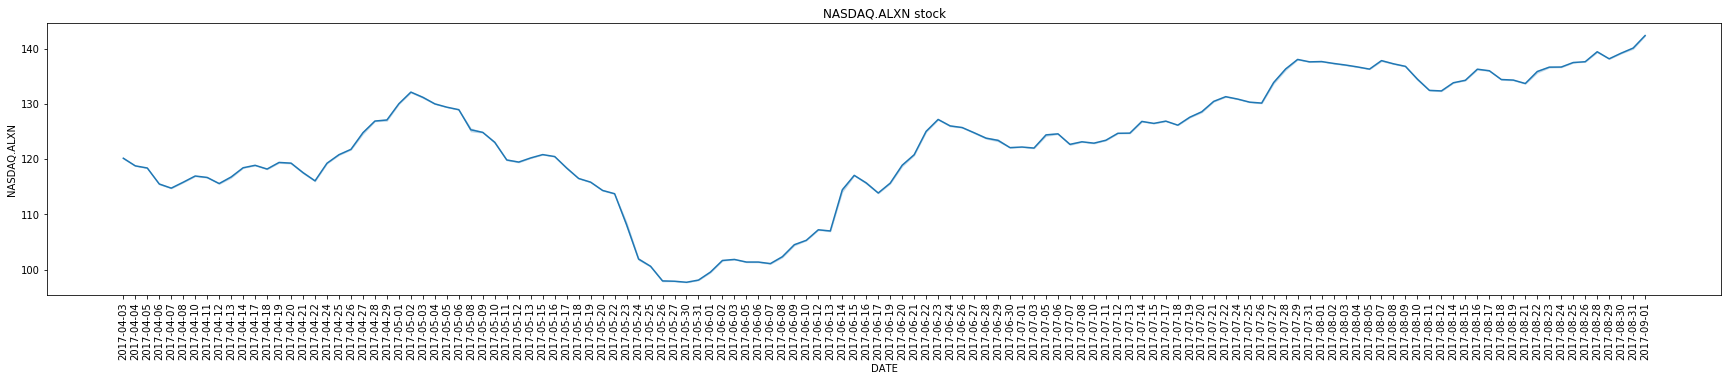

In [18]:
import datetime as dt
plt.figure(figsize= (20,20))
for i,col in enumerate(stock_data.iloc[:,0:10].columns.values):
    if i==0:
        continue
    else:
        plt.figure(figsize= (30,5))
        plt.title(col + ' stock')
        plt.xlabel('Date')
        plt.ylabel('Stock value ' + str(col))
        plt.xticks(rotation=90)
        sns.lineplot(stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d')),
                     stock_data.iloc[:,i],)

In [19]:
date_df = pd.DataFrame()
date_df['date'] = stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
date_df['time'] = stock_data.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%X'))
date_df.head()

,date,time
0,2017-04-03,19:00:00
1,2017-04-03,19:01:00
2,2017-04-03,19:02:00
3,2017-04-03,19:03:00
4,2017-04-03,19:04:00


In [20]:
date_df.groupby(by='date').count().shape # No. of days the data was taken

(128, 1)

In [21]:
stock_prices = stock_data.drop('DATE', axis =1)

***In order to find out the optimal number of clusters upon which we can train our data, we need to find the least number of clusters where the change in Sum of Squared Errors (SSE) starts flatlining(becomes asymptotic) when we plot the SSE errors for different number of clusters according to the elbow method***

Text(0.5,1,'Elbow curve')

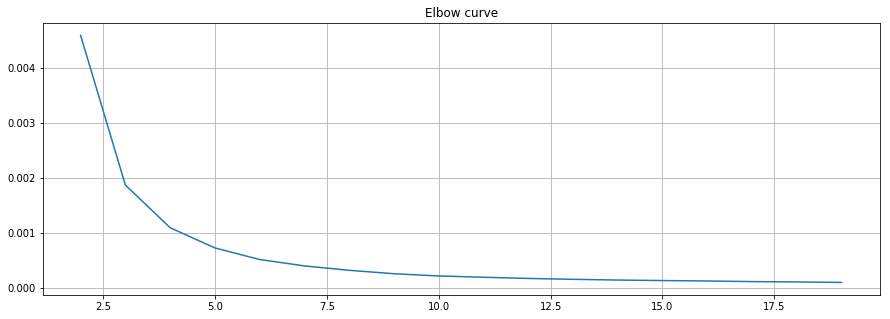

In [22]:
# Calculate average annual percentage return and volatilities over the time period of the data in the dataset
performance = stock_prices.pct_change().mean() * 128
performance = pd.DataFrame(performance)
performance.columns = ['Performance']
performance['Volatility'] = stock_prices.pct_change().std() * sqrt(128)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

X = data
wc_sse = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wc_sse.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wc_sse)
plt.grid(True)
plt.title('Elbow curve')

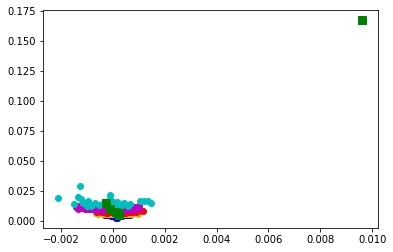

In [23]:
# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

In [24]:
#identify the outlier
print(performance.idxmax())

Performance    NYSE.XRX
Volatility     NYSE.XRX
dtype: object


In [25]:
#drop the relevant stock from our data
performance.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

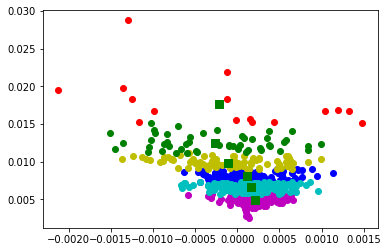

In [26]:
# computing K-Means with K = 6(6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

#  Problem 1:   There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance?

In [27]:
similar_performance = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
similar_performance

[('SP500', 4),
 ('NASDAQ.AAL', 1),
 ('NASDAQ.AAPL', 5),
 ('NASDAQ.ADBE', 5),
 ('NASDAQ.ADI', 0),
 ('NASDAQ.ADP', 0),
 ('NASDAQ.ADSK', 3),
 ('NASDAQ.AKAM', 3),
 ('NASDAQ.ALXN', 3),
 ('NASDAQ.AMAT', 1),
 ('NASDAQ.AMD', 2),
 ('NASDAQ.AMGN', 5),
 ('NASDAQ.AMZN', 0),
 ('NASDAQ.ATVI', 0),
 ('NASDAQ.AVGO', 1),
 ('NASDAQ.BBBY', 1),
 ('NASDAQ.BIIB', 0),
 ('NASDAQ.CA', 1),
 ('NASDAQ.CBOE', 5),
 ('NASDAQ.CELG', 5),
 ('NASDAQ.CERN', 5),
 ('NASDAQ.CHRW', 0),
 ('NASDAQ.CHTR', 1),
 ('NASDAQ.CINF', 5),
 ('NASDAQ.CMCSA', 5),
 ('NASDAQ.CME', 5),
 ('NASDAQ.COST', 5),
 ('NASDAQ.CSCO', 0),
 ('NASDAQ.CSX', 0),
 ('NASDAQ.CTAS', 5),
 ('NASDAQ.CTSH', 4),
 ('NASDAQ.CTXS', 0),
 ('NASDAQ.DISCA', 1),
 ('NASDAQ.DISCK', 1),
 ('NASDAQ.DISH', 1),
 ('NASDAQ.DLTR', 3),
 ('NASDAQ.EA', 1),
 ('NASDAQ.EBAY', 0),
 ('NASDAQ.EQIX', 0),
 ('NASDAQ.ESRX', 1),
 ('NASDAQ.ETFC', 0),
 ('NASDAQ.EXPD', 5),
 ('NASDAQ.EXPE', 0),
 ('NASDAQ.FAST', 1),
 ('NASDAQ.FB', 5),
 ('NASDAQ.FFIV', 1),
 ('NASDAQ.FISV', 4),
 ('NASDAQ.FITB', 1),
 ('NASD

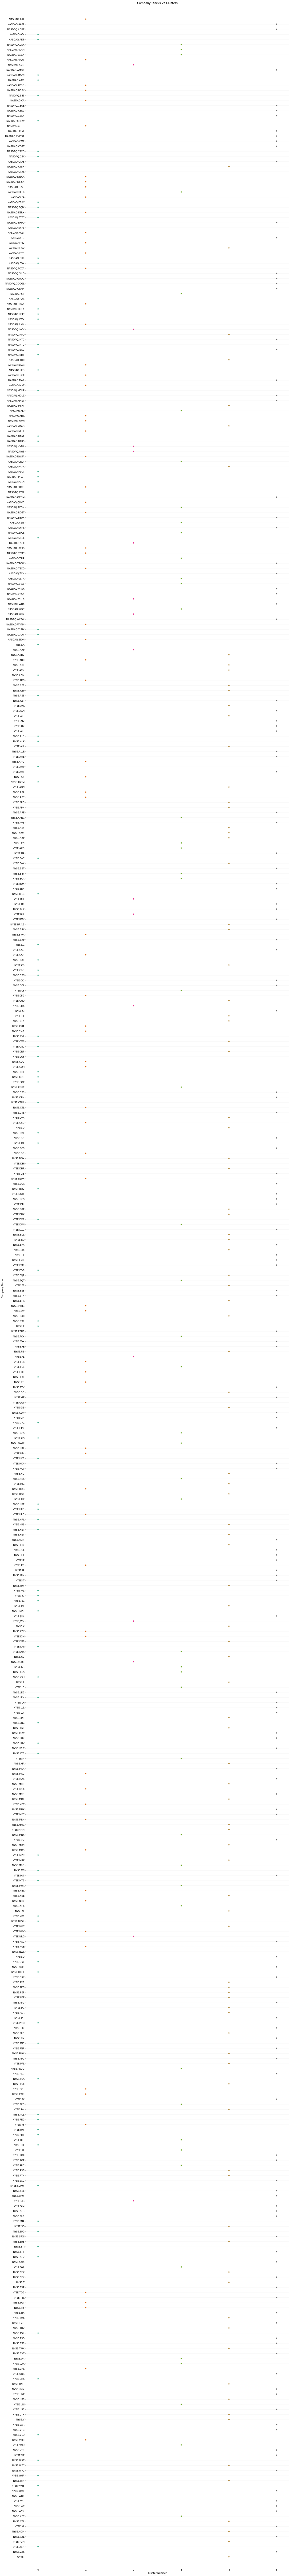

In [28]:
plt.figure(figsize = (20,200))
plt.title('Company Stocks Vs Clusters\n')
plt.ylim(-2,len(performance.index.values)+1)
plt.xlabel('Cluster Number')
plt.ylabel('Company Stocks')
plt.gca().invert_yaxis()
plt.grid(axis='both', alpha= 0.1)

sns.scatterplot(x=idx, y= performance.index.values, hue = idx,palette= 'Dark2', legend= False)

# Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price?

***Unique patterns that exist in the historical stock data set = 6***

# Problem 3: Identify which all stocks are moving together and which all stocks are different from each other?

In [29]:
moving_together = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
moving_together

[('SP500', 4),
 ('NASDAQ.AAL', 1),
 ('NASDAQ.AAPL', 5),
 ('NASDAQ.ADBE', 5),
 ('NASDAQ.ADI', 0),
 ('NASDAQ.ADP', 0),
 ('NASDAQ.ADSK', 3),
 ('NASDAQ.AKAM', 3),
 ('NASDAQ.ALXN', 3),
 ('NASDAQ.AMAT', 1),
 ('NASDAQ.AMD', 2),
 ('NASDAQ.AMGN', 5),
 ('NASDAQ.AMZN', 0),
 ('NASDAQ.ATVI', 0),
 ('NASDAQ.AVGO', 1),
 ('NASDAQ.BBBY', 1),
 ('NASDAQ.BIIB', 0),
 ('NASDAQ.CA', 1),
 ('NASDAQ.CBOE', 5),
 ('NASDAQ.CELG', 5),
 ('NASDAQ.CERN', 5),
 ('NASDAQ.CHRW', 0),
 ('NASDAQ.CHTR', 1),
 ('NASDAQ.CINF', 5),
 ('NASDAQ.CMCSA', 5),
 ('NASDAQ.CME', 5),
 ('NASDAQ.COST', 5),
 ('NASDAQ.CSCO', 0),
 ('NASDAQ.CSX', 0),
 ('NASDAQ.CTAS', 5),
 ('NASDAQ.CTSH', 4),
 ('NASDAQ.CTXS', 0),
 ('NASDAQ.DISCA', 1),
 ('NASDAQ.DISCK', 1),
 ('NASDAQ.DISH', 1),
 ('NASDAQ.DLTR', 3),
 ('NASDAQ.EA', 1),
 ('NASDAQ.EBAY', 0),
 ('NASDAQ.EQIX', 0),
 ('NASDAQ.ESRX', 1),
 ('NASDAQ.ETFC', 0),
 ('NASDAQ.EXPD', 5),
 ('NASDAQ.EXPE', 0),
 ('NASDAQ.FAST', 1),
 ('NASDAQ.FB', 5),
 ('NASDAQ.FFIV', 1),
 ('NASDAQ.FISV', 4),
 ('NASDAQ.FITB', 1),
 ('NASD